#### Group one
1. Joel Kioko
2. Immaculate Kimani
3. Neema Gatonye
4. Patience Severino
5. Chepkwony Joy
6. George Ikuro

# Project Overview

This project aims to explore key trends in the movie industry, including genres, themes, and audience preferences that are driving box office performance.

# **1. Business Understanding**

As the company ventures into the movie busness it is important to understand the key trends in the industry. These insights will help guide strategic decisions and ensure the new movie studio produces films that resonate with audiences and maximize profitability.

####Hypothesis
Ho: There is no significant difference in revenue over number of votes

H1 :There is a significant difference in revenue over number of votes.



#### Objectives
* To identify the effect of ratings across different genres.
* To determine the genres that generates highest revenue/profit.
* To identify the trends in revenue generation.


# **2. Data Understanding**

The Dataset is obtained from:
 * [imdb](https://www.imdb.com/)
 * [Box Offive mojo](https://www.boxofficemojo.com/)

The datasets will be merged to obtain a unique dataset that combines attributes from each individual dataset to give the best data to be used for analysis.

The final combined dataset consists of 1873 rows and 14 columns.

***Key attributes***

*   Revenue details: *domestic_gross, foreign_gross*
*   Movie details: title, year, runtime, genre, ratings





In [1]:
#Import necessary libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**3. Data Preparation.**
* **Preprocesing.**

In [2]:
# Loading the DB

im_db = '/content/im.db'

# Open up a connection
conn = sqlite3.connect(im_db)

# Initialize a cursor
cursor = conn.cursor()

In [3]:
# Identify tables in our SQL DB

table_name_query = """SELECT name
                      AS 'Table Names'
                      FROM sqlite_master
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
#Check what we have in the movie_basics table

tbl_movie_basic = ''' select * from
movie_basics;'''

# view top 5 records as DF
basic_DF=pd.read_sql(tbl_movie_basic, conn)
basic_DF.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#Inspect records in the DFtable
basic_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
basic_DF.duplicated().sum()

0

In [7]:
basic_DF.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [8]:
#Check what we have in the movie_basics table

tbl_movie_rating = ''' select * from
movie_ratings;'''

# view top 5 records as DF
rating_DF = pd.read_sql(tbl_movie_rating, conn)
rating_DF.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
rating_DF.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [10]:
#Inspect records in the DFrating
rating_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
rating_DF.duplicated().sum()

0

In [12]:
BR = ''' select * from
movie_basics mb
Left Join movie_ratings mr
on mb.movie_id=mr.movie_id

;'''

In [13]:
pd.read_sql(BR, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN


In [14]:
combined_table=pd.read_sql(BR, conn)
combined_table.isna().sum()
#no_id = combined_table[combined_table['movie_id'].isna()]
#no_id

,0
movie_id,0
primary_title,0
original_title,21
start_year,0
runtime_minutes,31739
genres,5408
movie_id,72288
averagerating,72288
numvotes,72288


In [15]:
combined_table.duplicated().sum()

0

In [16]:
#Load the CSV file
csvfile = pd.read_csv('./bom.movie_gross.csv.gz')
csvfile.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
#Merge with the DF from the SQLite on the common field.

mergedDF= pd.merge(combined_table,csvfile,
                   left_on=['primary_title','start_year'] ,
                   right_on=['title','year'])
mergedDF

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",tt0315642,7.1,15378.0,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",tt0337692,6.1,37886.0,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,7.0,539338.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,tt8878922,They Shall Not Grow Old,They Shall Not Grow Old,2018,47.0,"Biography,Documentary,History",None,NaN,NaN,They Shall Not Grow Old,WB,18000000.0,NaN,2018
1869,tt9042690,The Negotiation,The Negotiation,2018,89.0,"Documentary,History,War",tt9042690,7.6,43.0,The Negotiation,CJ,111000.0,NaN,2018
1870,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",tt9078374,6.4,322.0,Last Letter,CL,181000.0,NaN,2018
1871,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",tt9151704,8.8,2067.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


The data is merged to obtain a combined dataset to be used for analysis

In [19]:
#Keep necessary columns
mergedDF = mergedDF.loc[:, ~mergedDF.columns.duplicated()]
mergedDF.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [20]:
DF=mergedDF[['movie_id','primary_title','runtime_minutes', 'genres','averagerating', 'numvotes',
       'studio', 'domestic_gross', 'foreign_gross', 'year']]

In [21]:
DF.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,"1,019.4",2015


In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1873 non-null   object 
 1   primary_title    1873 non-null   object 
 2   runtime_minutes  1863 non-null   float64
 3   genres           1871 non-null   object 
 4   averagerating    1847 non-null   float64
 5   numvotes         1847 non-null   float64
 6   studio           1871 non-null   object 
 7   domestic_gross   1863 non-null   float64
 8   foreign_gross    1278 non-null   object 
 9   year             1873 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 146.5+ KB


In [23]:
# Convert the Dtypes of numeric vaiables accordingly

DF['runtime_minutes']=DF['runtime_minutes'].astype(float)

DF['averagerating']=DF['averagerating'].astype(float)
DF['numvotes']=DF['numvotes'].astype(float)

DF['domestic_gross']=DF['domestic_gross'].astype(float)
DF['foreign_gross'] = pd.to_numeric(DF['foreign_gross'], errors='coerce')
DF['foreign_gross']=DF['foreign_gross'].astype(float)
DF['year'] = pd.to_numeric(DF['year'], errors='coerce')
DF['year']=DF['year'].astype(int)

In [24]:
DF.isnull().sum()

,0
movie_id,0
primary_title,0
runtime_minutes,10
genres,2
averagerating,26
numvotes,26
studio,2
domestic_gross,10
foreign_gross,599
year,0


In [25]:
# Drop all movies without title
DF=DF.dropna(subset=['movie_id'])

In [26]:
DF.isnull().sum()

,0
movie_id,0
primary_title,0
runtime_minutes,10
genres,2
averagerating,26
numvotes,26
studio,2
domestic_gross,10
foreign_gross,599
year,0


In [27]:
DF.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1863.000000,1847.000000,1.847000e+03,1.863000e+03,1.274000e+03,1873.000000
mean,110.331186,6.422794,9.166869e+04,4.236055e+07,9.511677e+07,2014.002670
std,20.480174,1.004203,1.502088e+05,7.683175e+07,1.523659e+08,2.516716
min,5.000000,1.600000,6.000000e+00,3.000000e+02,6.000000e+02,2010.000000
25%,96.000000,5.800000,7.642000e+03,5.520000e+05,7.400000e+06,2012.000000
50%,107.000000,6.500000,3.546500e+04,1.050000e+07,3.130000e+07,2014.000000
75%,122.000000,7.100000,1.055535e+05,5.150000e+07,1.033750e+08,2016.000000
max,189.000000,8.800000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [28]:
# Let add a  column that aggregates the total income but first replace missing of these columns with zero to allow proper aggregation
DF['domestic_gross'] = DF['domestic_gross'].fillna(0)
DF['foreign_gross'] = DF['foreign_gross'].fillna(0)
DF['Total_Revenue']=DF['domestic_gross'] + DF['foreign_gross']
DF.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,Total_Revenue
0,tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000.0,0.0,2016,1100000.0
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000.0,2013,188100000.0
3,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000.0,2014,53200000.0
4,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,0.0,2015,652300000.0


In [29]:
def RT_band(runtime_minutes):
    if(runtime_minutes <=60):
        return("1 hr and below")
    elif (runtime_minutes >60 and runtime_minutes <=120):
        return("Approx 2 hrs")
    elif (runtime_minutes >120 and runtime_minutes <=180):
        return("Approx 3 hrs")
    else:
         return("Over 3 hrs")

In [30]:
DF['RT_band']=DF['runtime_minutes'].apply(RT_band)
DF.head(3)

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,Total_Revenue,RT_band
0,tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000.0,0.0,2016,1100000.0,Approx 2 hrs
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000.0,2012,8744000.0,Approx 3 hrs
2,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000.0,2013,188100000.0,Approx 2 hrs


In [31]:
#Recheck if we still have missing
missing_cols = DF.isnull().sum()[DF.isnull().sum() > 0]
missing_cols

,0
runtime_minutes,10
genres,2
averagerating,26
numvotes,26
studio,2


* **Feature Engineering.**

In [32]:
# Lets check the distribution of the numerical variables before deciding the missing replacement method

In [33]:
num_vars= DF.select_dtypes('number')
num_vars.head(10)

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,Total_Revenue
0,103.0,7.1,15378.0,1100000.0,0.0,2016,1100000.0
1,124.0,6.1,37886.0,744000.0,8000000.0,2012,8744000.0
2,114.0,7.3,275300.0,58200000.0,129900000.0,2013,188100000.0
3,114.0,6.5,105116.0,26300000.0,26900000.0,2014,53200000.0
4,124.0,7.0,539338.0,652300000.0,0.0,2015,652300000.0
5,119.0,6.2,94787.0,13100000.0,10800000.0,2011,23900000.0
6,108.0,6.1,12898.0,544000.0,0.0,2016,544000.0
7,92.0,5.1,28570.0,44300000.0,10500000.0,2012,54800000.0
8,100.0,7.8,366366.0,200800000.0,391000000.0,2010,591800000.0
9,132.0,6.6,241792.0,73100000.0,211100000.0,2012,284200000.0


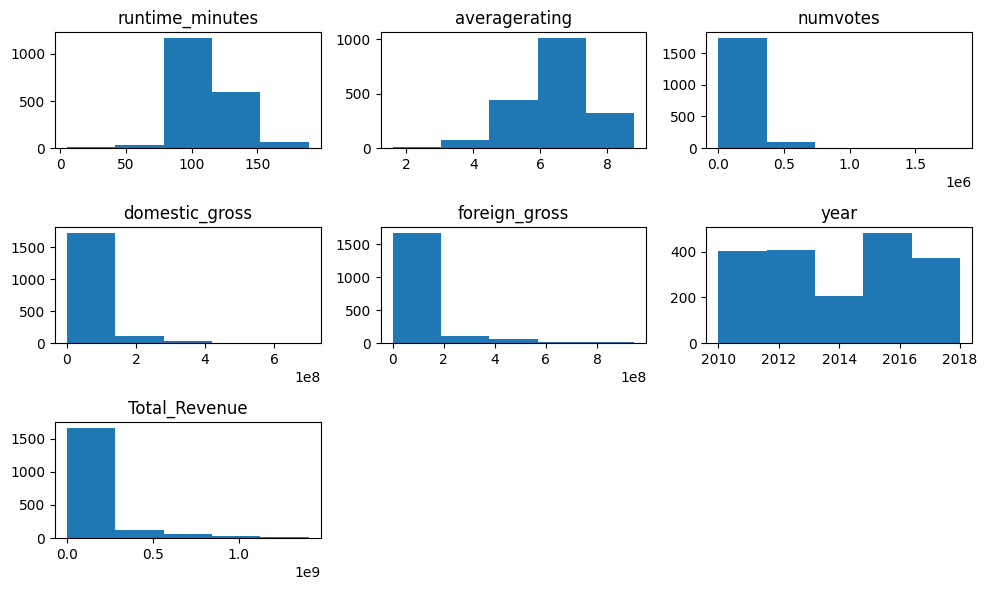

In [34]:
#Plot the distributions
import matplotlib.pyplot as plt

num_vars.hist(bins=5, figsize=(10, 6), grid=False)

# Show the plots
plt.tight_layout()
plt.show()

Based on the above, Runtime and Num votes are negatively and positively skewed respectively and therefore we use the median to input the missing. While average rating exhibit almost a normal distribution, therefore we use the mean to input the missing.

In [35]:
DF['runtime_minutes']=DF['runtime_minutes'].fillna(DF['runtime_minutes'].median())
DF['numvotes']=DF['numvotes'].fillna(DF['numvotes'].median())

In [36]:
DF['averagerating']=DF['averagerating'].fillna(DF['averagerating'].mean())

In [37]:
# Confirm no more missing
missing_cols = DF.isnull().sum()[DF.isnull().sum() > 0]
missing_cols

,0
genres,2
studio,2


In [38]:
#Create the non numeric dataset
cat_vars= DF.select_dtypes(exclude='number')
cat_vars.head(3)

,movie_id,primary_title,genres,studio,RT_band
0,tt0315642,Wazir,"Action,Crime,Drama",Relbig.,Approx 2 hrs
1,tt0337692,On the Road,"Adventure,Drama,Romance",IFC,Approx 3 hrs
2,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",Fox,Approx 2 hrs


In [39]:
cat_vars.describe()

,movie_id,primary_title,genres,studio,RT_band
count,1873,1873,1871,1871,1873
unique,1873,1833,262,165,4
top,tt0315642,The Wall,Drama,Uni.,Approx 2 hrs
freq,1,3,100,126,1341


In [40]:
#Lets check categorical data visualy
num_vars.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,Total_Revenue
count,1863.000000,1847.000000,1.847000e+03,1.873000e+03,1.873000e+03,1873.000000,1.873000e+03
mean,110.331186,6.422794,9.166869e+04,4.213439e+07,6.469768e+07,2014.002670,1.068321e+08
std,20.480174,1.004203,1.502088e+05,7.668845e+07,1.332518e+08,2.516716,2.000485e+08
min,5.000000,1.600000,6.000000e+00,0.000000e+00,0.000000e+00,2010.000000,3.000000e+02
25%,96.000000,5.800000,7.642000e+03,5.390000e+05,0.000000e+00,2012.000000,1.300000e+06
50%,107.000000,6.500000,3.546500e+04,1.010000e+07,8.000000e+06,2014.000000,2.480000e+07
75%,122.000000,7.100000,1.055535e+05,5.090000e+07,5.840000e+07,2016.000000,1.104000e+08
max,189.000000,8.800000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09


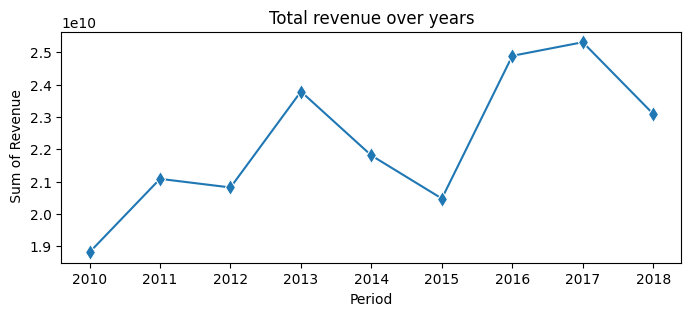

In [41]:
#Lets visualize the Revenue over years and check the pattern
import seaborn as sns

yr_rev=DF.groupby('year')['Total_Revenue'].sum().reset_index()
plt.figure(figsize=(8,3))
sns.lineplot(data=yr_rev, x='year', y='Total_Revenue', marker='d',markersize=8).set(title="Total revenue over years", xlabel='Period', ylabel=' Sum of Revenue')
#plt.savefig("Linegraph1.png", dpi=500, bbox_inches="tight")
plt.show()

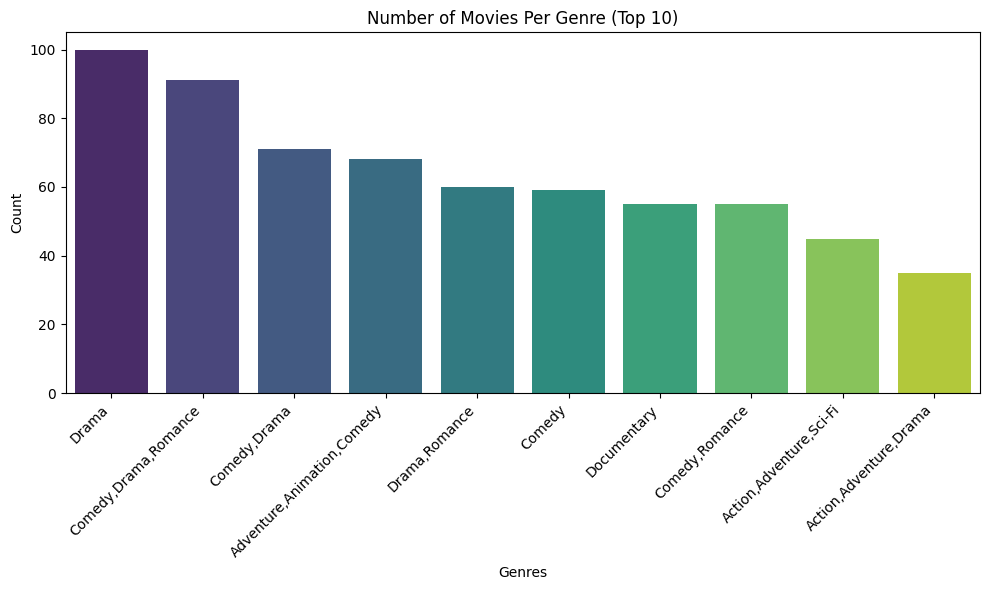

In [42]:

# Count the occurrences of each genre
genre_counts = DF['genres'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of Movies Per Genre (Top 10)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



But does this translate to revenue generation?

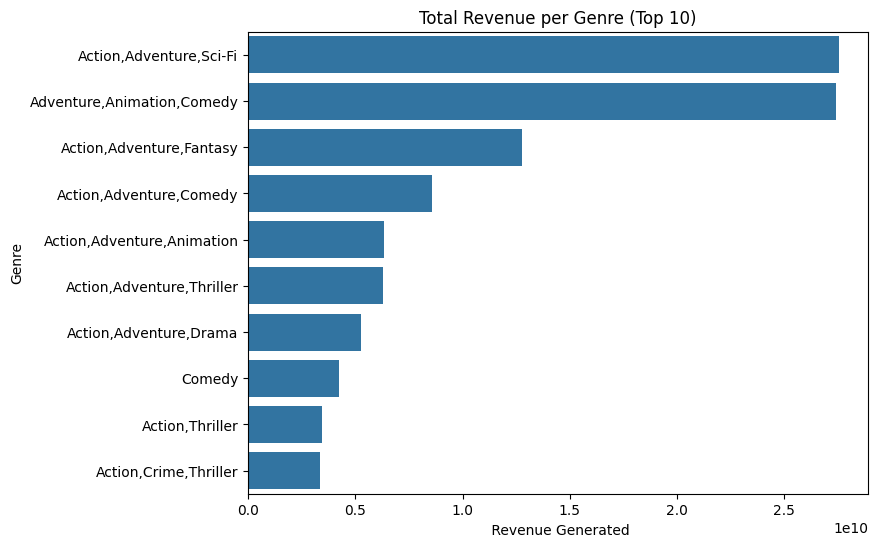

In [43]:
genSales=DF.groupby(['genres'])['Total_Revenue'].sum().reset_index().sort_values(by='Total_Revenue', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=genSales, y='genres', x='Total_Revenue', orient="y").set(title="Total Revenue per Genre (Top 10)", ylabel='Genre', xlabel=' Revenue Generated')

#Export the graph
#plt.savefig("barplot2.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

<Axes: >

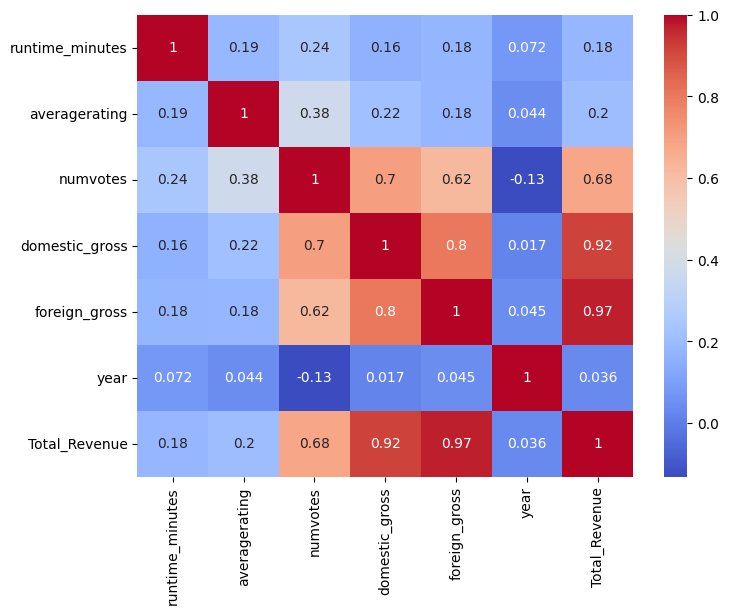

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(num_vars.corr(),annot=True, cmap='coolwarm')

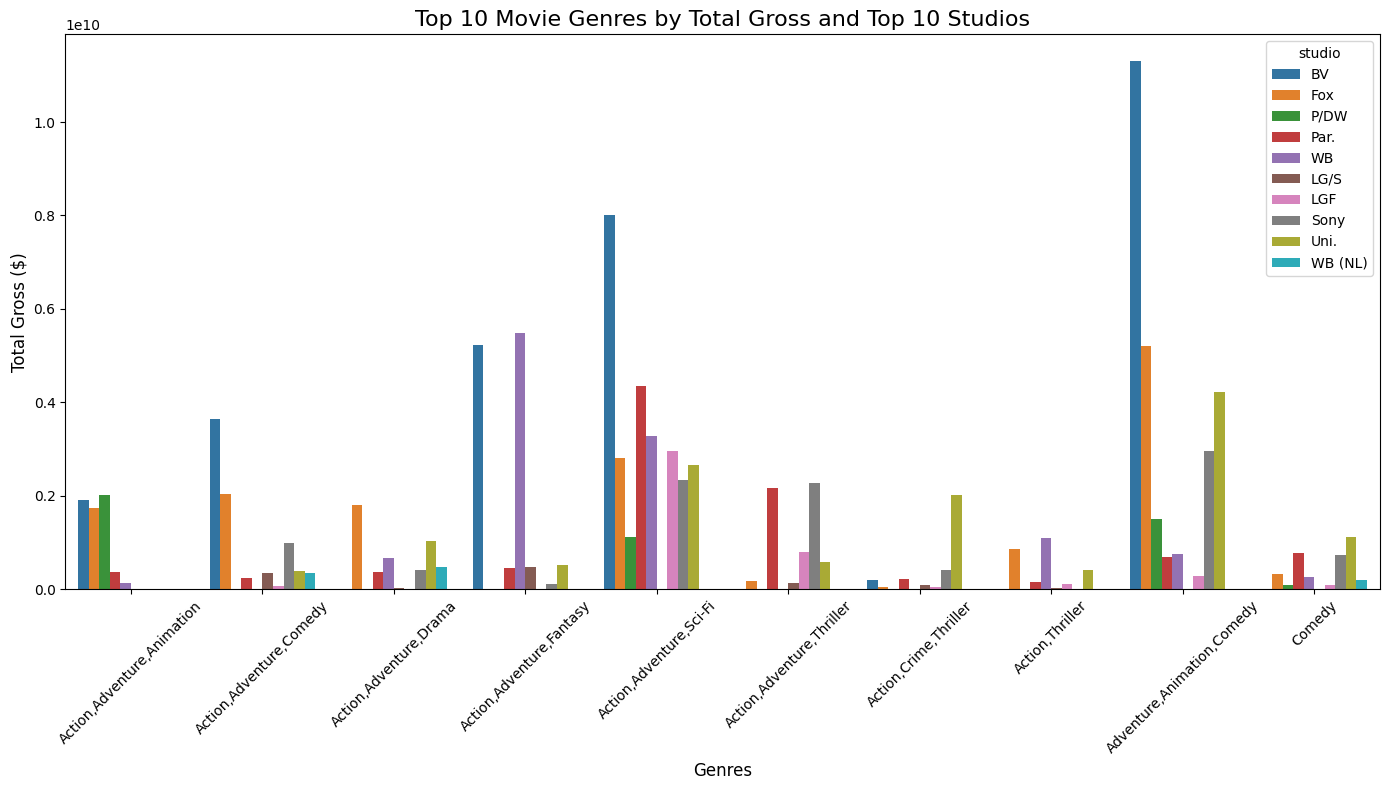

In [45]:

# Starting with Group by 'genres' and 'studio', then sum the 'Total_Revenue' for each group
grouped_df = DF.groupby(['genres', 'studio'])['Total_Revenue'].sum().reset_index()

# Getting the top 10 genres by total gross
top_genres = grouped_df.groupby('genres')['Total_Revenue'].sum().nlargest(10).index
top_genres_df = grouped_df[grouped_df['genres'].isin(top_genres)]

# Getting the top 10 studios by total gross
top_studios = top_genres_df.groupby('studio')['Total_Revenue'].sum().nlargest(10).index
top_studios_df = top_genres_df[top_genres_df['studio'].isin(top_studios)]

# Creating the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='genres', y='Total_Revenue', hue='studio', data=top_studios_df)
plt.title('Top 10 Movie Genres by Total Gross and Top 10 Studios', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Total Gross ($)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**4. Modelling/Statistical analysis**

**Linear Regression**

In [46]:
# Import libraries
import statsmodels.api as sm

In [47]:

# Defining the independent variable and dependent variable
X = DF[['numvotes']]
y = DF['Total_Revenue']

# Adding  a constant to the independent variable
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Total_Revenue   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.20e-255
Time:                        07:22:45   Log-Likelihood:                -37874.
No. Observations:                1873   AIC:                         7.575e+04
Df Residuals:                    1871   BIC:                         7.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.388e+07   3.96e+06      6.026      0.0

**Relationship:** There is a statistically significant positive relationship between numvotes and Total_Revenue. Each additional vote tends to increase the total revenue by approximately 912.65.

**Fit:** The model explains about 46.4% of the variability in Total_Revenue.

**Significance:** Both the model and the predictor (numvotes) are highly significant.

**Residuals:** The residuals might not be perfectly normal (as seen from the Omnibus and skewness/kurtosis tests), which might indicate some model misfit or the need for transformations

Since our P-value is less than 0.05 we reject the null hypothesis and conclude there is a statistical significance relationship between revenue and number of votes.

# **Conclusion**


**Revenue by Genre:** Genres like Action, Adventure, and Sci-Fi consistently generate higher revenues, emphasizing the need to focus on producing films within these popular categories to capture broad audience appeal.

**Audience Engagement and Revenue:** Movies with higher audience engagement ( reflected by the number of votes) show a significant positive correlation with total revenue. This indicates the importance of building a strong online presence and encouraging audience feedback to drive financial success.

**Revenue Growth Over Time:** Total movie revenue has steadily increased over the years, highlighting the movie industry’s growth and its expanding global reach.

**Model Limitations:** While the linear regression model identified the number of votes as a significant predictor of revenue, its relatively low R-squared value (46.4%) and multicollinearity suggest the need to incorporate additional variables, such as genres, ratings, and studios, to improve the model's predictive accuracy.

# **Recommendations**

**Focus on High-Grossing Genres:** Prioritize films in successful genres like Action and Adventure, which consistently perform well at the box office.Understanding audience preferences within these genres can significantly boost profitability

**Boost Audience Engagement:** Since audience votes strongly correlate with revenue, the studio should actively encourage participation through targeted campaigns and fan-driven promotions, both before and after a film’s release.

**Track Revenue Trends:** To stay competitive in the evolving movie industry, the studio should track changes in revenue patterns over time. Monitor changes in consumer behavior, regional preferences, and technology (e.g., streaming) to stay ahead of industry shifts.

**Leverage Studio Branding and Partnerships:** Analyze the success patterns of top-performing studios and identify opportunities for improvement or collaboration. Partnering with leading studios or well-known directors can enhance brand visibility and drive higher revenue for films.